<a href="https://colab.research.google.com/github/pankajroy97/Pankaj-Roy-LGMVIP--DataScience/blob/main/Iris_Flower_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

In [25]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

In [26]:
#importing dataframe
df=pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
#Drop unnecessary columns
df.drop('Id',axis=1,inplace=True)

In [28]:
df.shape

(150, 5)

In [29]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.duplicated().sum()

3

In [33]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

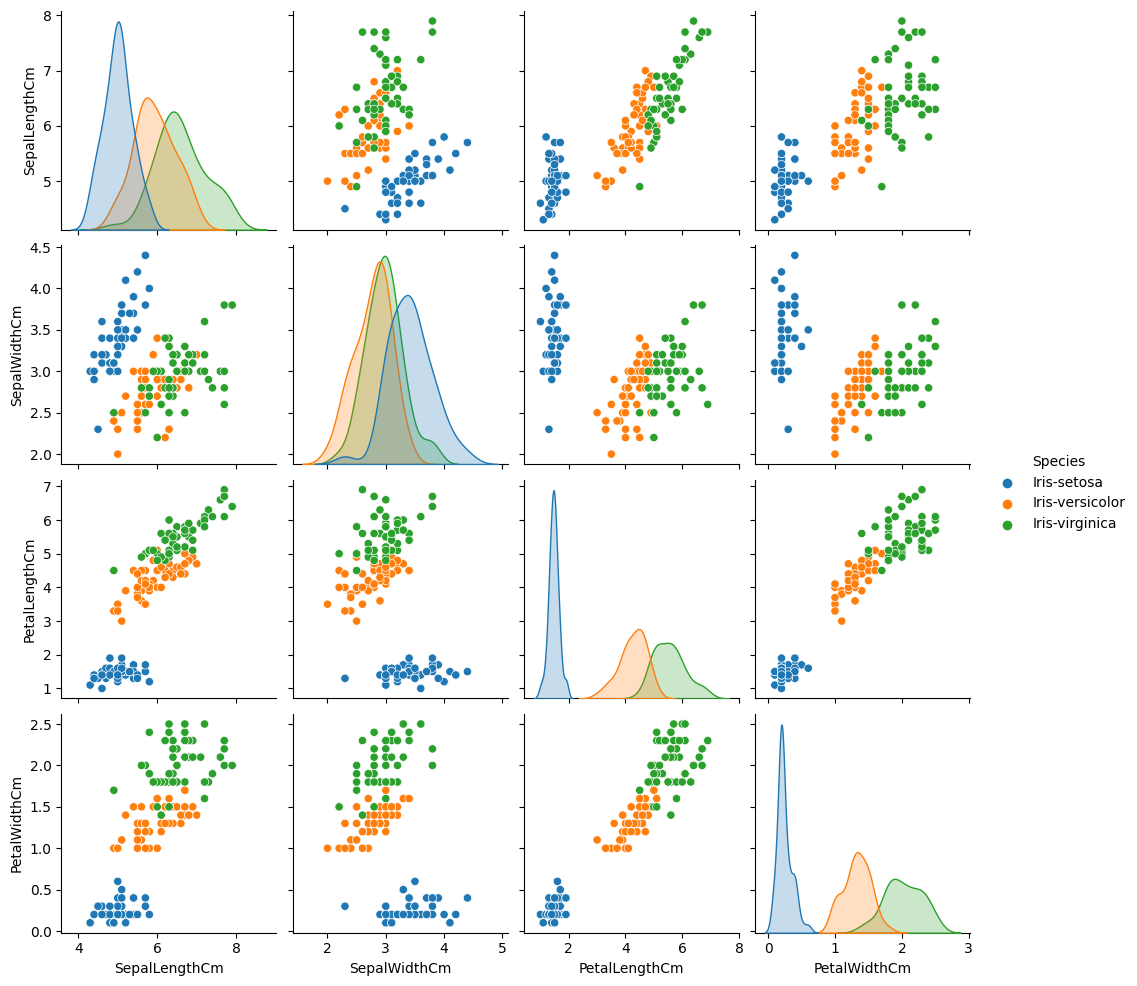

In [34]:
sns.pairplot(df,hue='Species')

In [35]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Text(0.5, 1.0, 'Data Distribution Based on Species')

<Figure size 800x600 with 0 Axes>

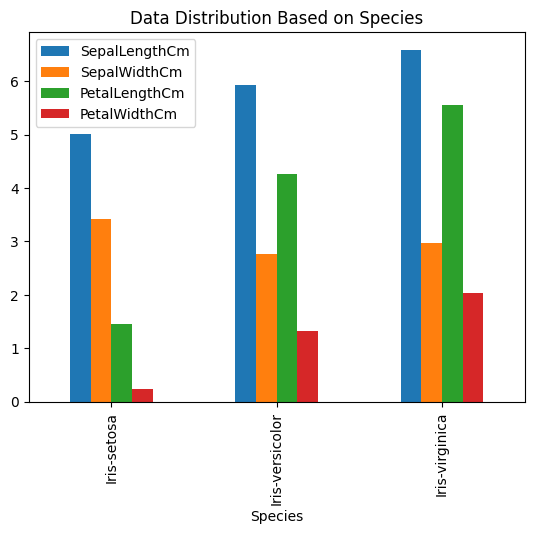

In [36]:
plt.figure(figsize=(8,6))
x2=df.groupby('Species')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean()
x2.plot(kind='bar')
plt.title('Data Distribution Based on Species')

From this data visualization,Iris-virginica sepal length and petal length is larger so we can say that this largest flower and Iris-setosa is shorter flower in this dataset

<Axes: >

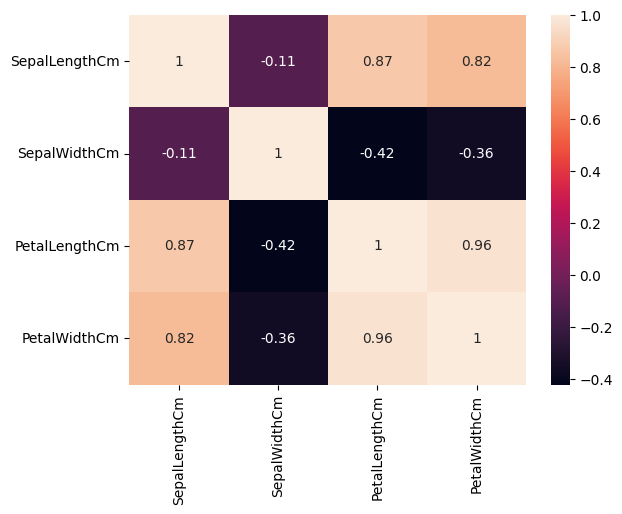

In [71]:
correlation=df.corr()
sns.heatmap(correlation,annot=True)

###Selecting independent and dependent variable

In [37]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [39]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_train_prediction=model.predict(x_train)
y_test_prediction=model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_test_prediction)
print(cm)
cr=classification_report(y_test,y_test_prediction)
print(cr)

[[11  0  0]
 [ 0 13  0]
 [ 0  3 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.92        38
      macro avg       0.94      0.93      0.93        38
   weighted avg       0.94      0.92      0.92        38



In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy score in training data",accuracy_score(y_train,y_train_prediction))
print("Accuracy score in testing data",accuracy_score(y_test,y_test_prediction))

Accuracy score in training data 1.0
Accuracy score in testing data 0.9210526315789473


From this accuracy score we can say that model is overfitted

In [43]:
from sklearn.tree import plot_tree
cn=['0','1','2'] #class names
fn=x_train.columns  #features names
print(cn,fn)

['0', '1', '2'] Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


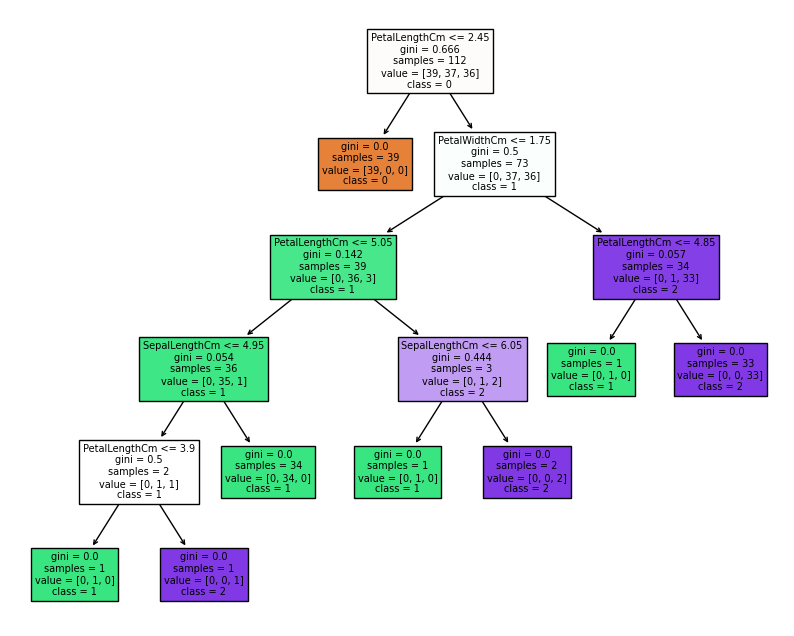

In [44]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.show()

Handle the overfitting model by minimizing depth of decision tree using entropy criterion

In [45]:
model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=10)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [49]:
y_train_prediction_new=model_dt.predict(x_train)
y_test_prediction_new=model_dt.predict(x_test)

In [50]:
print("Accuracy score in training data",accuracy_score(y_train,y_train_prediction_new))
print("Accuracy score in testing data",accuracy_score(y_test,y_test_prediction_new))

Accuracy score in training data 0.9821428571428571
Accuracy score in testing data 0.9210526315789473


Now you see that the difference between Accuracy of training and testing data slightly minimizing

###Lets check what is the prediction outcomes from new dataset

In [65]:
df_new=pd.DataFrame({'SepalLengthCm':[4.5,6.8,3.2,5.1,7.1],'SepalWidthCm':[5.1,3.5,1.4,3.5,3.0],'PetalLengthCm':[4.7,3.2,1.3,1.4,5.9],'PetalWidthCm':[5.0,3.6,1.4,0.2,2.1]})

In [62]:
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.5,5.1,4.7,5.0
1,6.8,3.5,3.2,3.6
2,3.2,1.4,1.3,1.4
3,5.1,3.5,1.4,0.2
4,5.3,2.5,4.6,1.9


In [66]:
y_test_prediction_new=model_dt.predict(df_new)
y_test_prediction_new

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)